In [19]:
import os
import shutil
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
RAW_SOURCE_PATH = "/content/drive/Shared drives/Bangkit Data/Bany/train_augmentation"
SOURCE_PATH = "/tmp/source"
if (!os.path.isdir(SOURCE_PATH)): os.mkdir(SOURCE_PATH)

KeyboardInterrupt: ignored

In [12]:
for dir in os.listdir(RAW_SOURCE_PATH):
  raw = os.path.join(RAW_SOURCE_PATH, dir)
  target = os.path.join(SOURCE_PATH, dir)
  if (os.path.isdir(target)):
    print("Skipping {}".format(raw))
    pass
  else:
    print("Copying {} to {}".format(raw, target))
    shutil.copytree(raw, target)

Skipping /content/drive/Shared drives/Bangkit Data/Bany/train_augmentation/cbb
Skipping /content/drive/Shared drives/Bangkit Data/Bany/train_augmentation/cbsd
Copying /content/drive/Shared drives/Bangkit Data/Bany/train_augmentation/cgm to /tmp/source/cgm
Copying /content/drive/Shared drives/Bangkit Data/Bany/train_augmentation/cmd to /tmp/source/cmd
Copying /content/drive/Shared drives/Bangkit Data/Bany/train_augmentation/healthy to /tmp/source/healthy


In [13]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    SOURCE_PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    SOURCE_PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 10901 images belonging to 5 classes.
Found 2722 images belonging to 5 classes.


In [14]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, 5, activation="relu", input_shape=train_generator.image_shape),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D(pool_size=(3,3)),
                             tf.keras.layers.Conv2D(64, 3, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D(pool_size=(3,3)),
                             tf.keras.layers.Conv2D(128, 3, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D(pool_size=(3,3)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1024, activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1024, activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(256, activation="relu"),
                             tf.keras.layers.Dense(5, activation="softmax")
])

In [15]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
batch_normalization_3 (Batch (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 71, 71, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)      

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [21]:
epochs = 50
print(train_generator.image_shape)
history = model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator
                    )

(224, 224, 3)
Epoch 1/50
171/171 [==============================] - 89s 521ms/step - loss: 0.3444 - accuracy: 0.8773 - val_loss: 1.9993 - val_accuracy: 0.4904
Epoch 2/50
171/171 [==============================] - 89s 519ms/step - loss: 0.2827 - accuracy: 0.8981 - val_loss: 2.6391 - val_accuracy: 0.5055
Epoch 3/50
171/171 [==============================] - 90s 525ms/step - loss: 0.2565 - accuracy: 0.9099 - val_loss: 2.2742 - val_accuracy: 0.5272
Epoch 4/50
171/171 [==============================] - 90s 525ms/step - loss: 0.2066 - accuracy: 0.9309 - val_loss: 2.3680 - val_accuracy: 0.4853
Epoch 5/50
171/171 [==============================] - 89s 522ms/step - loss: 0.1929 - accuracy: 0.9347 - val_loss: 1.6559 - val_accuracy: 0.6003
Epoch 6/50
171/171 [==============================] - 90s 524ms/step - loss: 0.1619 - accuracy: 0.9459 - val_loss: 5.1890 - val_accuracy: 0.4368
Epoch 7/50
171/171 [==============================] - 89s 520ms/step - loss: 0.1546 - accuracy: 0.9492 - val_loss: 2

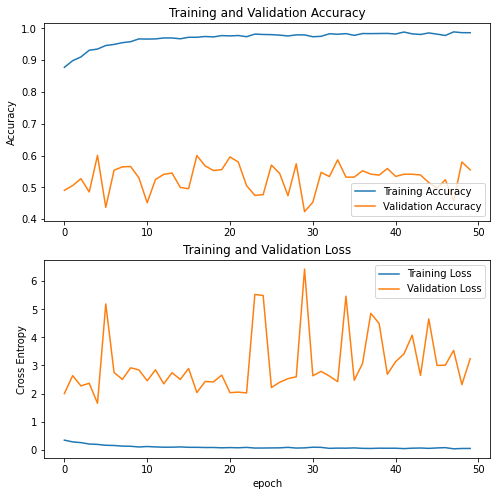

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Save the model into tfjs layers

In [23]:
!pip install tensorflowjs
import tensorflowjs as tfjs
from datetime import datetime

tmp_path = "/tmp/keras_tfjs"
if os.path.isdir(tmp_path): shutil.rmtree(tmp_path)
os.makedirs(tmp_path, exist_ok=True)
tfjs.converters.save_keras_model(model, tmp_path)
with open(os.path.join(tmp_path, 'report.txt'),'w') as fh:
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: fh.write(x + '\n'))

datestring = datetime.now().strftime("%Y%m%d%H%M%S")
file_path = os.path.join("/content/drive/My Drive/bangkit/data/cassava_disesase", "cassava-model.{}.zip".format(datestring))
cmd = "zip -r '{}' /tmp/keras_tfjs".format(file_path)
print(cmd)
os.system(cmd)

     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 144.4MB 83kB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 256kB 53.9MB/s 
     |████████████████████████████████| 921kB 50.1MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=3c98f5806af2aa93244080584b0efa55bc535d3ab6f8ab73efc135a571c37739
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation:

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


zip -r '/tmp/cassava-model.20200620160848.zip' /tmp/keras_tfjs


0

In [24]:
datestring = datetime.now().strftime("%Y%m%d%H%M%S")
file_path = os.path.join("/content/drive/My Drive/bangkit/data/cassava_disesase", "cassava-model.{}.zip".format(datestring))
cmd = "zip -r '{}' /tmp/keras_tfjs".format(file_path)
print(cmd)
os.system(cmd)

zip -r '/content/drive/My Drive/bangkit/data/cassava_disesase/cassava-model.20200620160852.zip' /tmp/keras_tfjs


0